# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

coord_lat = []
coord_lon = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
found_cities = []
country = []

city_counter = 0

for city in cities:
    response = requests.get(query_url + city).json()
    city_counter = city_counter + 1
    print (f"{city_counter} {city}")
    try:
        coord_lat.append(response['coord']['lat'])
        coord_lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        found_cities.append(response["name"])
        country.append(response["sys"]["country"])
    except:
        print("city not found")


1 barrow
2 hilo
3 guerrero negro
4 khatanga
5 shangqiu
6 belushya guba
city not found
7 rikitea
8 bluff
9 punta arenas
10 provideniya
11 muros
12 east london
13 tuatapere
14 astoria
15 amderma
city not found
16 upernavik
17 puerto ayora
18 hendijan
city not found
19 arraial do cabo
20 caravelas
21 yellowknife
22 sataua
city not found
23 mirador
24 tumannyy
city not found
25 chicama
26 lebu
27 attawapiskat
city not found
28 avarua
29 leningradskiy
30 dingle
31 tukrah
32 tiksi
33 garden city
34 vila velha
35 rawannawi
city not found
36 koryazhma
37 eskisehir
38 cabo san lucas
39 butaritari
40 longyearbyen
41 illoqqortoormiut
city not found
42 hermanus
43 talnakh
44 tanete
45 busselton
46 torbay
47 kuytun
48 lucapa
49 fairbanks
50 sentyabrskiy
city not found
51 qaanaaq
52 hobart
53 carnarvon
54 watsa
55 dekar
56 marawi
57 cayenne
58 severo-kurilsk
59 nadym
60 synya
61 sitka
62 vaini
63 ereymentau
64 jamestown
65 san quintin
66 nabire
67 louis trichardt
68 coahuayana
69 constitucion
70 waw

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "city": found_cities,
    "country": country,
    "lat": coord_lat,
    "lon": coord_lon,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,country,lat,lon,temp,humidity,cloudiness,wind speed
0,Barrow,US,71.29,-156.79,42.80,87,90,16.11
1,Hilo,US,19.73,-155.09,74.88,83,90,1.43
2,Guerrero Negro,MX,27.98,-114.06,79.48,50,0,14.43
3,Khatanga,RU,71.97,102.50,51.33,84,3,8.34
4,Shangqiu,CN,34.45,115.65,82.00,92,100,1.01


In [5]:
weather_data.to_csv(output_data_file,index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data.loc[weather_data["humidity"] > 100]

,city,country,lat,lon,temp,humidity,cloudiness,wind speed


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

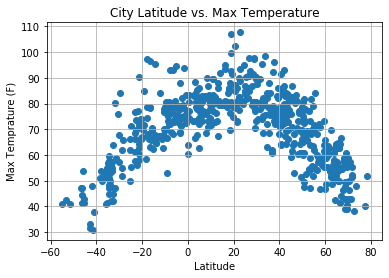

In [7]:
plt.scatter(weather_data["lat"], weather_data["temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.savefig("../output_data/temperature.png")
plt.show()

## Latitude vs. Humidity Plot

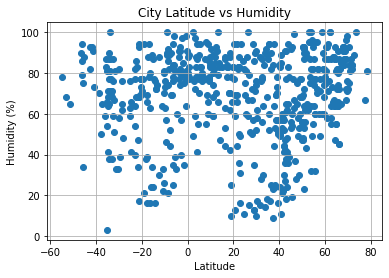

In [8]:
plt.scatter(weather_data["lat"], weather_data["humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid()
plt.savefig("../output_data/humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

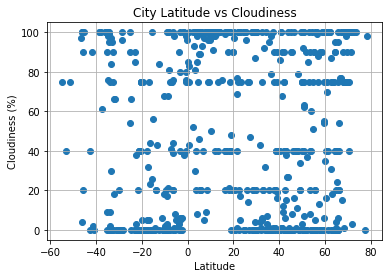

In [9]:
plt.scatter(weather_data["lat"], weather_data["cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid()
plt.savefig("../output_data/cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

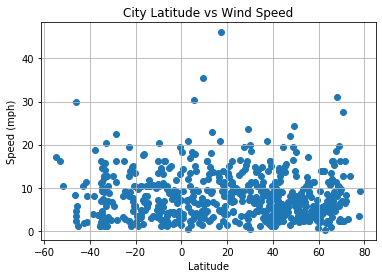

In [10]:
plt.scatter(weather_data["lat"], weather_data["wind speed"])
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.grid()
plt.savefig("../output_data/wind_speed.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = weather_data.loc[weather_data["lat"] >0]
southern_hem = weather_data.loc[weather_data["lat"] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

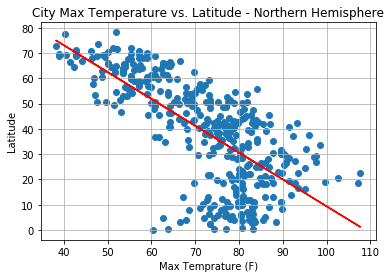

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem["temp"], northern_hem["lat"])
regress_values = northern_hem["temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem["temp"], northern_hem["lat"])
plt.title("City Max Temperature vs. Latitude - Northern Hemisphere")
plt.xlabel("Max Temprature (F)")
plt.ylabel("Latitude")
plt.grid()
plt.plot(northern_hem["temp"],regress_values,"r-")
plt.savefig("../output_data/tempvsNlat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

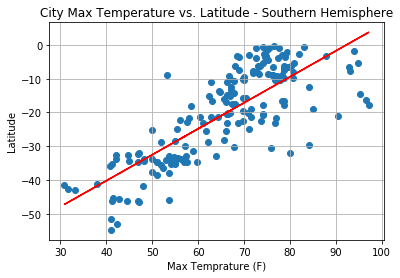

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem["temp"], southern_hem["lat"])
regress_values = southern_hem["temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(southern_hem["temp"], southern_hem["lat"])
plt.title("City Max Temperature vs. Latitude - Southern Hemisphere")
plt.xlabel("Max Temprature (F)")
plt.ylabel("Latitude")
plt.grid()
plt.plot(southern_hem["temp"],regress_values,"r-")
plt.savefig("../output_data/tempvsSlat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

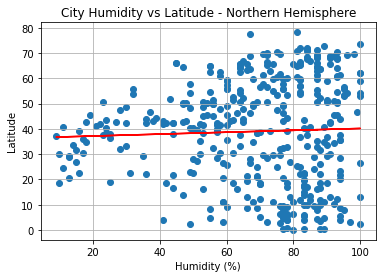

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem["humidity"], northern_hem["lat"])
regress_values = northern_hem["humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem["humidity"], northern_hem["lat"])
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("City Humidity vs Latitude - Northern Hemisphere")
plt.grid()
plt.plot(northern_hem["humidity"],regress_values,"r-")
plt.savefig("../output_data/humidvsNlat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

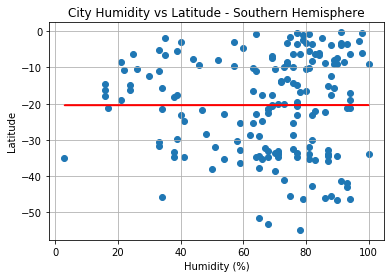

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem["humidity"], southern_hem["lat"])
regress_values = southern_hem["humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem["humidity"], southern_hem["lat"])
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("City Humidity vs Latitude - Southern Hemisphere")
plt.grid()
plt.plot(southern_hem["humidity"],regress_values,"r-")
plt.savefig("../output_data/humidvsSlat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

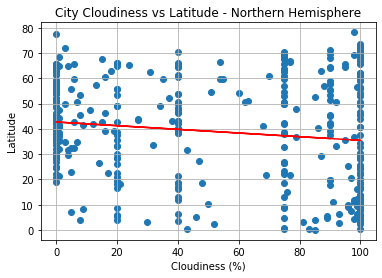

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem["cloudiness"], northern_hem["lat"])
regress_values = northern_hem["cloudiness"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem["cloudiness"], northern_hem["lat"])
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("City Cloudiness vs Latitude - Northern Hemisphere")
plt.grid()
plt.plot(northern_hem["cloudiness"],regress_values,"r-")
plt.savefig("../output_data/cloudvsNlat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

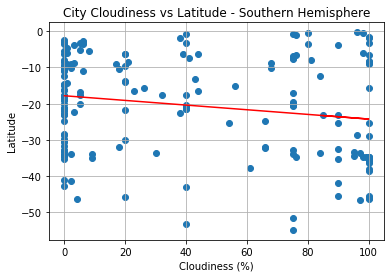

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem["cloudiness"], southern_hem["lat"])
regress_values = southern_hem["cloudiness"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem["cloudiness"], southern_hem["lat"])
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("City Cloudiness vs Latitude - Southern Hemisphere")
plt.grid()
plt.plot(southern_hem["cloudiness"],regress_values,"r-")
plt.savefig("../output_data/cloudvsSlat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

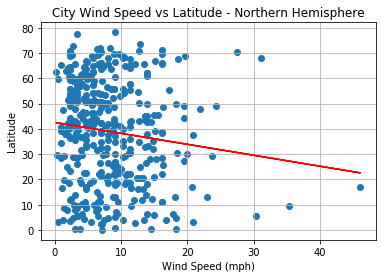

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem["wind speed"], northern_hem["lat"])
regress_values = northern_hem["wind speed"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem["wind speed"], northern_hem["lat"])
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("City Wind Speed vs Latitude - Northern Hemisphere")
plt.grid()
plt.plot(northern_hem["wind speed"],regress_values,"r-")
plt.savefig("../output_data/windvsNlat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

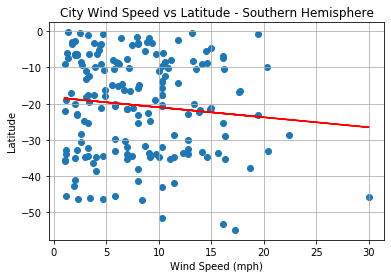

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem["wind speed"], southern_hem["lat"])
regress_values = southern_hem["wind speed"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem["wind speed"], southern_hem["lat"])
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("City Wind Speed vs Latitude - Southern Hemisphere")
plt.grid()
plt.plot(southern_hem["wind speed"],regress_values,"r-")
plt.savefig("../output_data/windvsSlat.png")
plt.show()